Archivo con EDA

In [2]:
#Traigo mis librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importo mis archivos para iniciar el EDA
df_calidadDelAire = pd.read_csv("..\Datasets_procesados_contaminacion\Calidad del aire.csv")
df_energia = pd.read_csv("..\Datasets_procesados_contaminacion\Energia.csv")
df_contaminacion_sonora = pd.read_csv("..\Datasets_procesados_contaminacion\Sonido_presencia.csv")

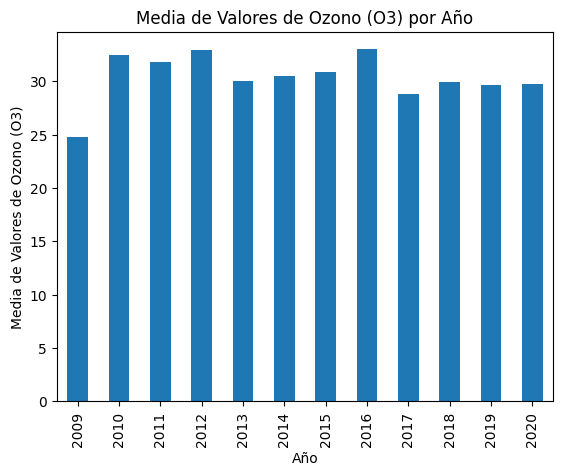

In [ ]:
# Filtrar los datos para obtener solo los registros de ozono
df_ozono = df_calidadDelAire[df_calidadDelAire['Name'] == 'Ozone (O3)']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_ozono.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Ozono (O3) por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Ozono (O3)')

plt.show()

#Si obtenemos los datos para las medias si se notan los cambios, observando un mayor crecimiento en 2016 sin embargo con cierta 
#tendencia a la disminución en 2020

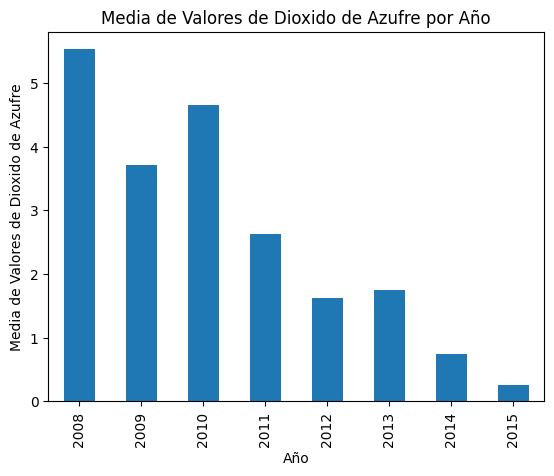

In [ ]:
# Filtrar los datos para obtener solo los registros de ozono
df_ozono = df_calidadDelAire[df_calidadDelAire['Name'] == 'Sulfur Dioxide (SO2)']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_ozono.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Dioxido de Azufre por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Dioxido de Azufre')

plt.show()

#Se observa calculado por las medias que existe una disminución progresiva del consumo de Dioxido de azufre

#En fecha de finalización se confirma que se mantuvo registro hasta el 2015


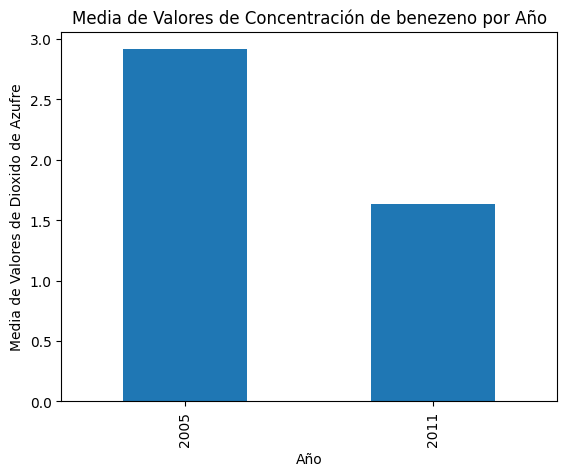

In [ ]:
# Filtrar los datos para obtener solo los registros de ozono
df_concentraciones_toxinas_Aire_benceno = df_calidadDelAire[df_calidadDelAire['Name'] == 'Air Toxics Concentrations- Average Benzene Concentrations']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_concentraciones_toxinas_Aire_benceno.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Concentración de benezeno por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Dioxido de Azufre')

plt.show()

#Cuando calculamos en base a la media de la distribución se observa una inversión de los valores, siendo más preponderante su consumo
#en 2005

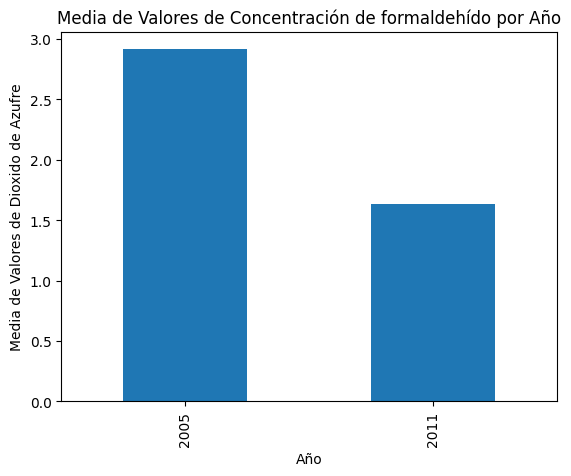

In [ ]:
# Filtrar los datos para obtener solo los registros de ozono
df_concentraciones_toxinas_Aire_formaldehido = df_calidadDelAire[df_calidadDelAire['Name'] == 'Air Toxics Concentrations- Average Formaldehyde Concentrations']

# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_concentraciones_toxinas_Aire_benceno.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Concentración de formaldehído por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Dioxido de Azufre')

plt.show()

#Cuando calculamos en base a la media de la distribución se observa una inversión de los valores, siendo más preponderante su consumo
#en 2005

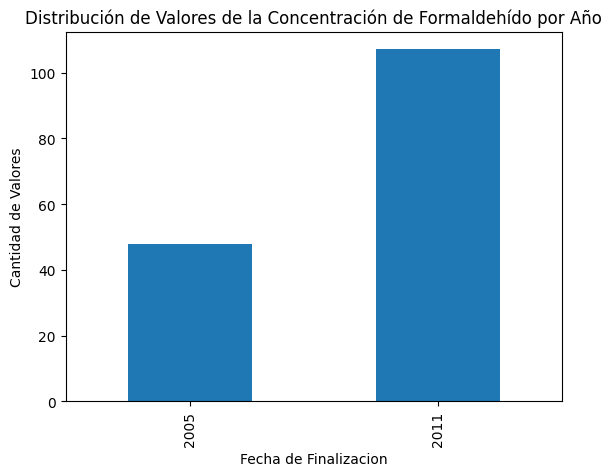

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_toxinas_Aire_formaldehido = df_calidadDelAire[df_calidadDelAire['Name'] == 'Air Toxics Concentrations- Average Formaldehyde Concentrations']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final la concentracion dado que este dato viene anual
ocurrencias_por_año = df_concentraciones_toxinas_Aire_formaldehido['Final_Date'].value_counts().sort_index() 

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Distribución de Valores de la Concentración de Formaldehído por Año')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Nuevamente se observa que los datos vienen solo para dos años en particular al igual que el benceno, siendo mayor en 2011

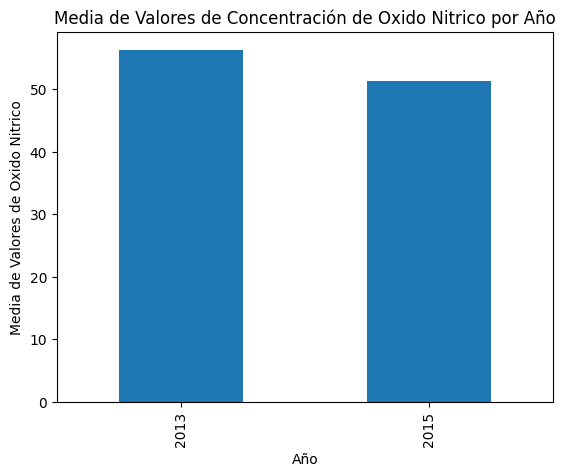

In [ ]:
# Filtrar los datos para obtener solo los registros de ozono
df_concentraciones_NOx = df_calidadDelAire[df_calidadDelAire['Name'] == 'Boiler Emissions- Total NOx Emissions']
# Agrupar los datos por año y calcular la media de los valores de ozono para cada año
medias_por_año = df_concentraciones_NOx.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = medias_por_año.plot(kind='bar', title='Media de Valores de Concentración de Oxido Nitrico por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Valores de Oxido Nitrico')

plt.show()

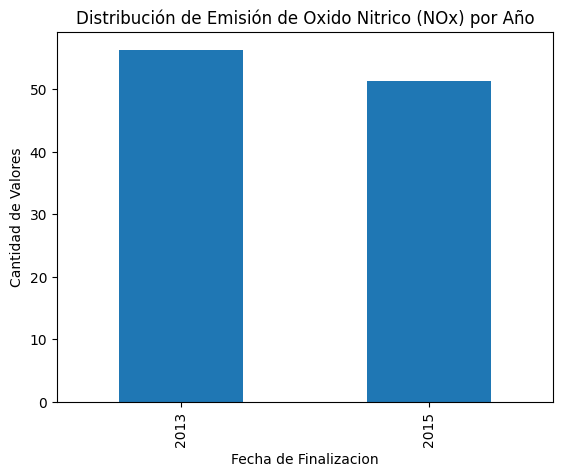

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_NOx = df_calidadDelAire[df_calidadDelAire['Name'] == 'Boiler Emissions- Total NOx Emissions']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final la concentracion dado que este dato viene anual
ocurrencias_por_año = df_concentraciones_NOx.groupby('Start_Date')['Data Value'].mean() 

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Distribución de Emisión de Oxido Nitrico (NOx) por Año')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa que en relacion a los dias si existe un cambio de al menos un 2%

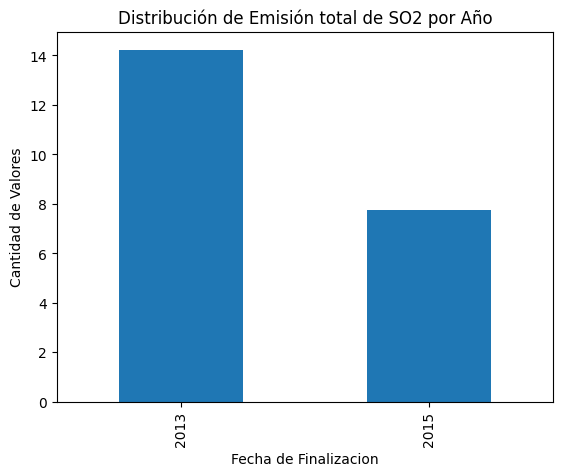

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_SO2 = df_calidadDelAire[df_calidadDelAire['Name'] == 'Boiler Emissions- Total SO2 Emissions']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final la concentracion dado que este dato viene anual
ocurrencias_por_año = df_concentraciones_SO2.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Distribución de Emisión total de SO2 por Año')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

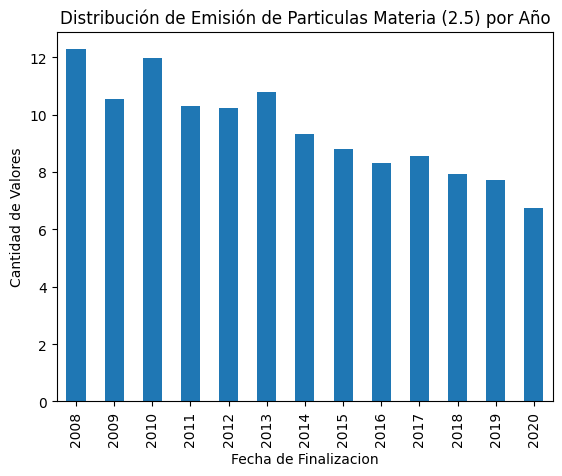

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_Matter = df_calidadDelAire[df_calidadDelAire['Name'] == 'Fine Particulate Matter (PM2.5)']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final la concentracion dado que este dato viene anual
ocurrencias_por_año = df_concentraciones_Matter.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Distribución de Emisión de Particulas Materia (2.5) por Año')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa una distribución decreciente con mayor enfasis en disminucion de la polucion en 2020


#####Se puede generar una búsqueda por año y localización geográfica. 

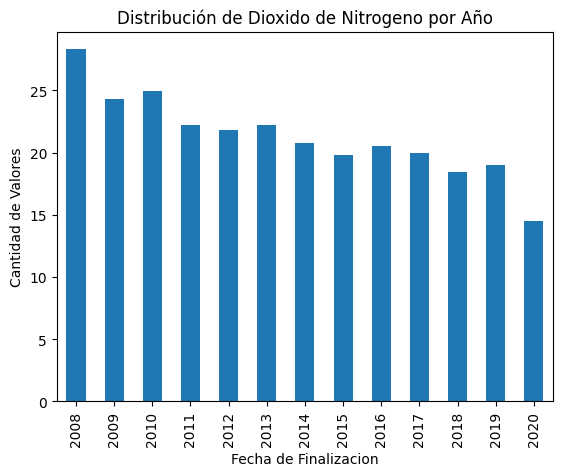

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_NO2 = df_calidadDelAire[df_calidadDelAire['Name'] == 'Nitrogen Dioxide (NO2)']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final la concentracion dado que este dato viene solo por winter
ocurrencias_por_año = df_concentraciones_NO2.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Distribución de Dioxido de Nitrogeno por Año')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()


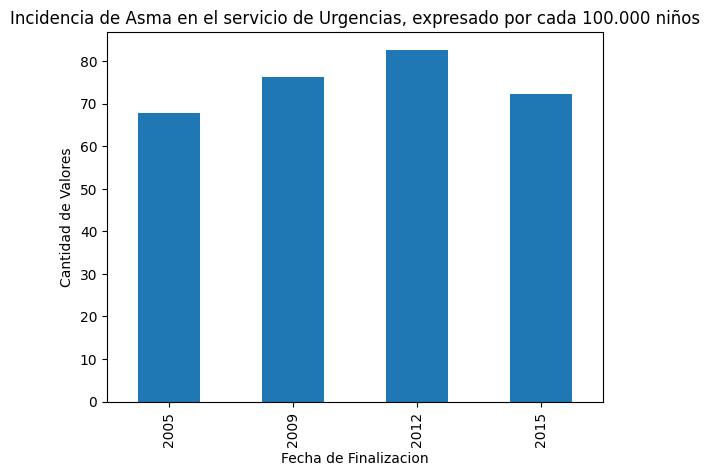

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_Asma_Urgencias = df_calidadDelAire[df_calidadDelAire['Name'] == 'O3-Attributable Asthma Emergency Department Visits']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_concentraciones_Asma_Urgencias.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de Asma en el servicio de Urgencias, expresado por cada 100.000 niños')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#El año con mayor indice de infantes hospitalizados en urgencias por asma fue en 2012



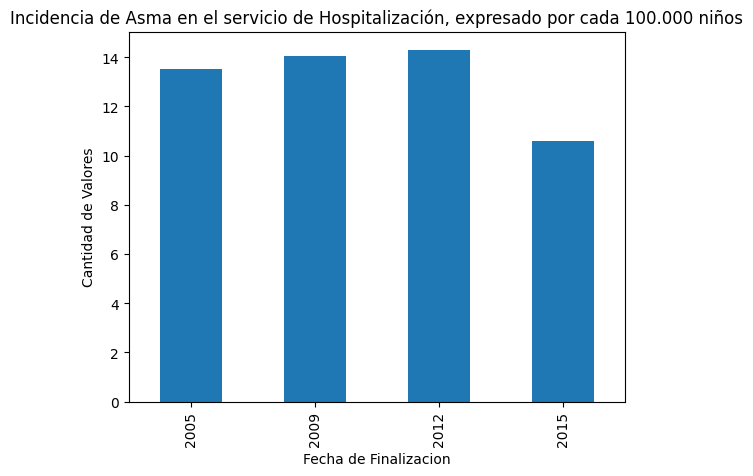

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_concentraciones_Asma_Hospitalizacion = df_calidadDelAire[df_calidadDelAire['Name'] == 'O3-Attributable Asthma Hospitalizations']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_concentraciones_Asma_Hospitalizacion.groupby('Start_Date')['Data Value'].mean() 

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de Asma en el servicio de Hospitalización, expresado por cada 100.000 niños')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa una disminucion de la incidencia de hospitalizacion hacia 2015 

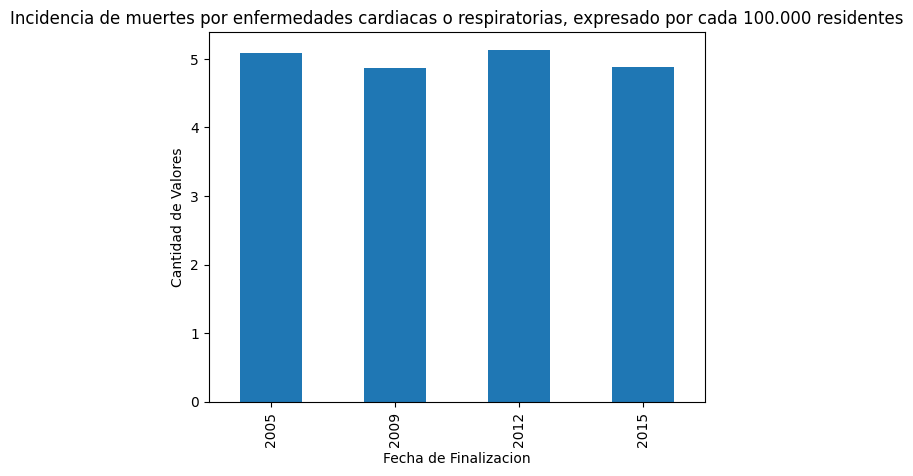

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_MuertesRespiratorias = df_calidadDelAire[df_calidadDelAire['Name'] == 'O3-Attributable Cardiac and Respiratory Deaths']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_MuertesRespiratorias.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de muertes por enfermedades cardiacas o respiratorias, expresado por cada 100.000 residentes')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se obser una distribucion casi estable en cuanto a incidencia en adultos de hospitalziacion por patologicas cardiacas o respiratorias

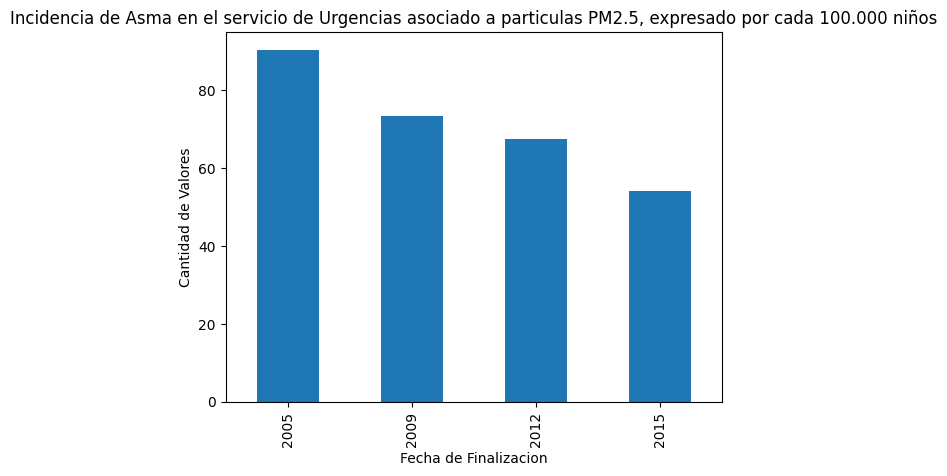

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_urgenciasPM25 = df_calidadDelAire[df_calidadDelAire['Name'] == 'PM2.5-Attributable Asthma Emergency Department Visits']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_urgenciasPM25.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de Asma en el servicio de Urgencias asociado a particulas PM2.5, expresado por cada 100.000 niños')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#La grafica evidencia una disminucion progresiva de casos de asma en urgencias por particulas asociadas a polucion

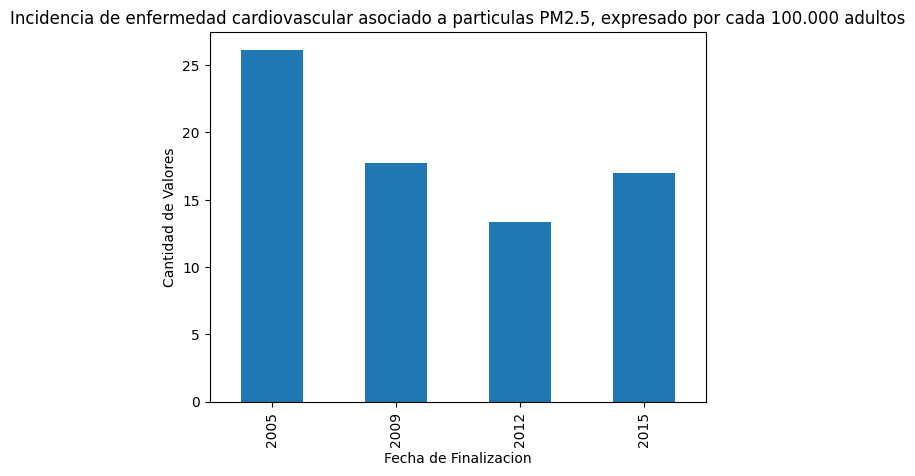

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_cardiovascular25Adultos = df_calidadDelAire[df_calidadDelAire['Name'] == 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_cardiovascular25Adultos.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de enfermedad cardiovascular asociado a particulas PM2.5, expresado por cada 100.000 adultos')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#La grafica muestra una disminucion de la incidencia de casos hacia 2012 con un repunte o nuevo crecimiento en 2015

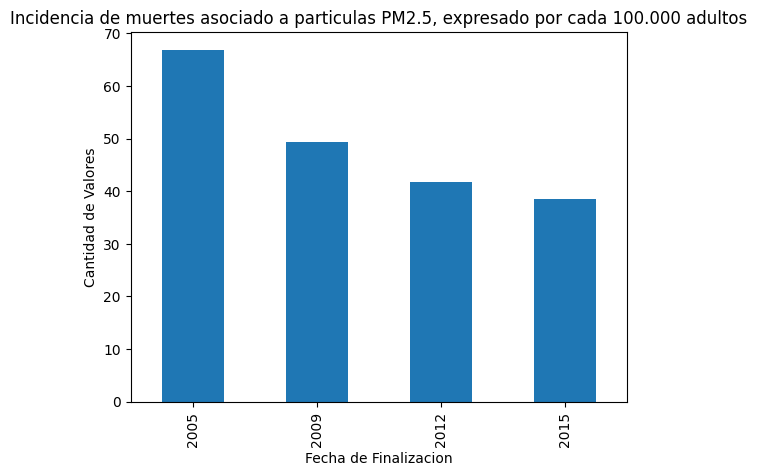

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_muertes_atribuidad_PM25 = df_calidadDelAire[df_calidadDelAire['Name'] == 'PM2.5-Attributable Deaths']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_muertes_atribuidad_PM25.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de muertes asociado a particulas PM2.5, expresado por cada 100.000 adultos')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se mantiene igual a otras gráficas similar en la cual se evidencia una disminucion de aproximadamente
# el 2% anual entre los años pautados, en cuanto a muertes en adultos siendo aproximadamente de 42 muertes por cada 100.000 adultos

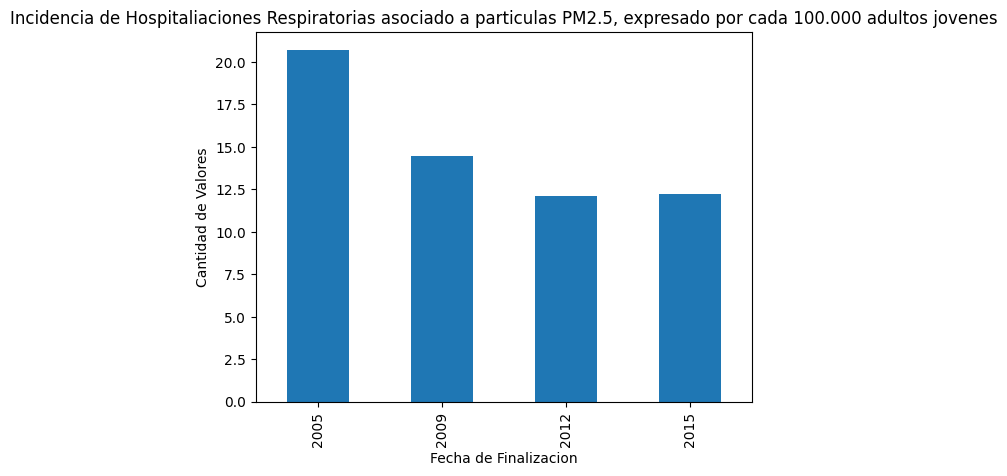

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_hospitalizacion_Adultos20a = df_calidadDelAire[df_calidadDelAire['Name'] == 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_hospitalizacion_Adultos20a.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Incidencia de Hospitaliaciones Respiratorias asociado a particulas PM2.5, expresado por cada 100.000 adultos jovenes')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Lo único interesante en esta parte es que en adultos jovenes existe un aumento de la inciencia de afecciones respiratorias en 2015 en relacion al
#201 de aproximadamente 1%

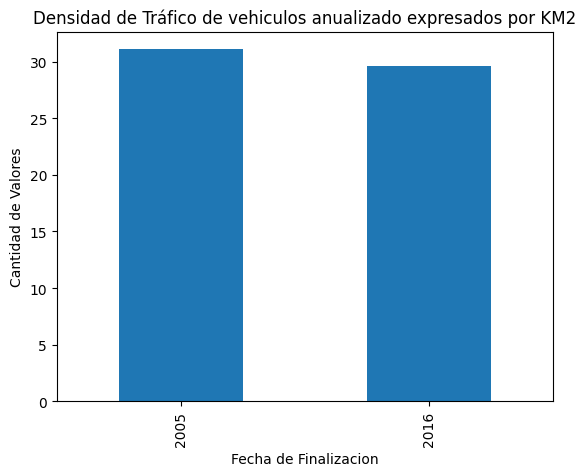

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_Densidad_Tráfico = df_calidadDelAire[df_calidadDelAire['Name'] == 'Traffic Density- Annual Vehicle Miles Traveled']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_Densidad_Tráfico.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Densidad de Tráfico de vehiculos anualizado expresados por KM2')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa ausencia de datos y se mantiene una tendencia casi igual entre los dos años representados de 30 aproximadamente por milla

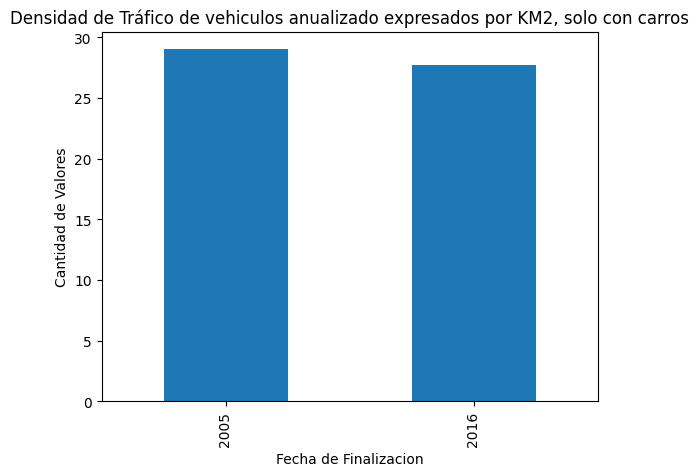

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_Densidad_Tráfico_carros = df_calidadDelAire[df_calidadDelAire['Name'] == 'Traffic Density- Annual Vehicle Miles Traveled for Cars']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_Densidad_Tráfico_carros.groupby('Start_Date')['Data Value'].mean()

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Densidad de Tráfico de vehiculos anualizado expresados por KM2, solo con carros')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa que existe mayor trafico de carros livianos en 2005 

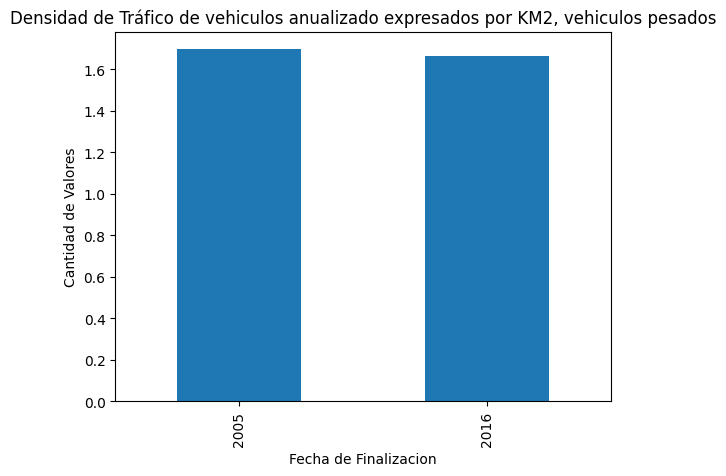

In [ ]:
# Genero los datos a partir de cada columna para evaluar si existe alguna distribución particular
df_Densidad_Tráfico_pesado = df_calidadDelAire[df_calidadDelAire['Name'] == 'Traffic Density- Annual Vehicle Miles Traveled for Trucks']

# Agrupo los datos por año, en teoría consideraré por anualizado fecha final dado que los datos vienen anualizados
ocurrencias_por_año = df_Densidad_Tráfico_pesado.groupby('Start_Date')['Data Value'].mean() 

# Trazar el gráfico de barras
ax = ocurrencias_por_año.plot(kind='bar', title='Densidad de Tráfico de vehiculos anualizado expresados por KM2, vehiculos pesados')
ax.set_xlabel('Fecha de Finalizacion')
ax.set_ylabel('Cantidad de Valores')

plt.show()

#Se observa una leve disminucion en relación a los demás datos observado que en 2005 del trafico pesado

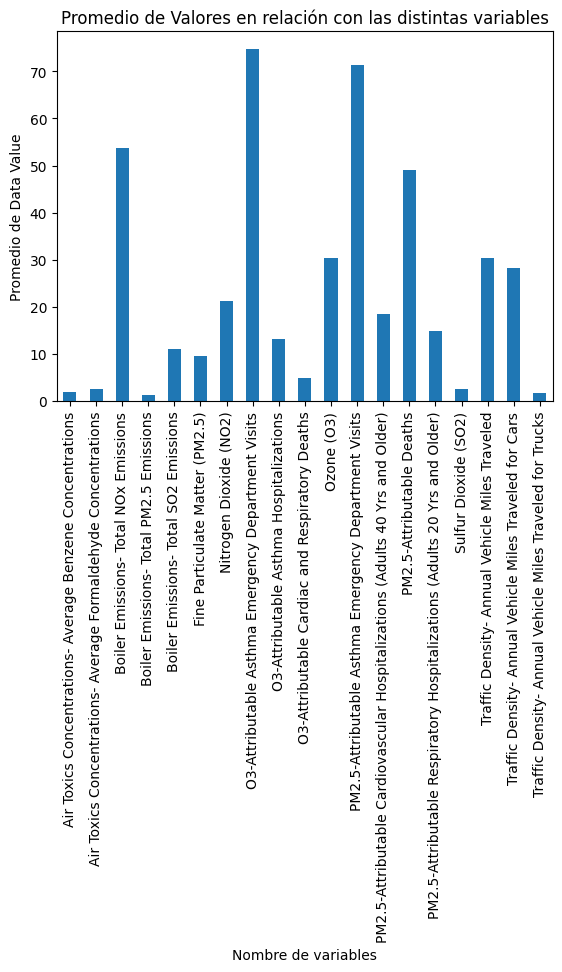

In [ ]:
#Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Trazar el gráfico de barras
promedio_data_value.plot(kind='bar', title='Promedio de Valores en relación con las distintas variables')
plt.xlabel('Nombre de variables')
plt.ylabel('Promedio de Data Value')
plt.show()


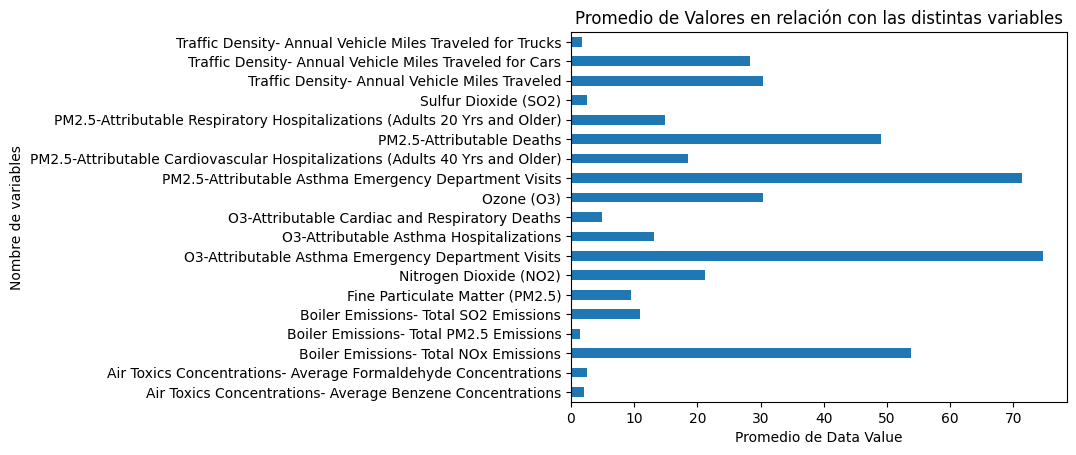

In [ ]:
# Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Trazar el histograma horizontal
promedio_data_value.plot(kind='barh', title='Promedio de Valores en relación con las distintas variables')
plt.xlabel('Promedio de Data Value')
plt.ylabel('Nombre de variables')
plt.show()


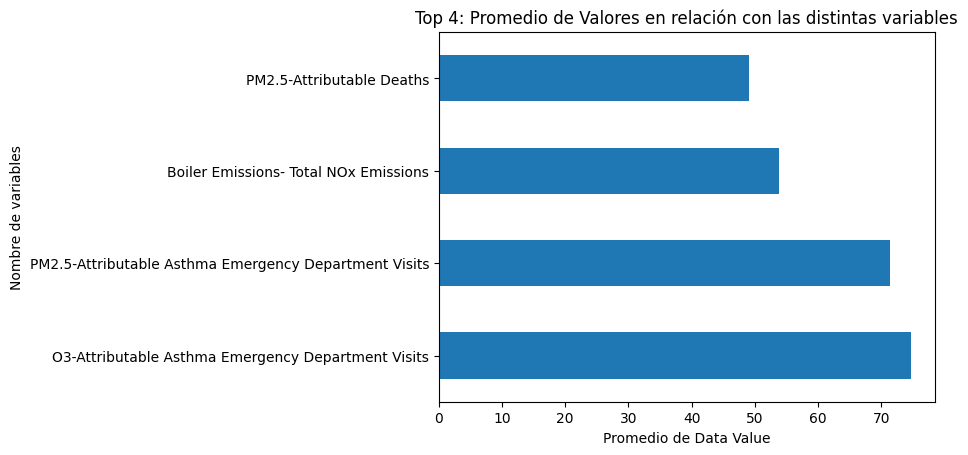

In [ ]:
# Genero una relación o agrupación 
promedio_data_value = df_calidadDelAire.groupby('Name')['Data Value'].mean()

# Ordenar el DataFrame en orden descendente
top_4 = promedio_data_value.sort_values(ascending=False).head(4)

# Trazar el histograma horizontal para el top 4
top_4.plot(kind='barh', title='Top 4: Promedio de Valores en relación con las distintas variables')
plt.xlabel('Promedio de Data Value')
plt.ylabel('Nombre de variables')
plt.show()


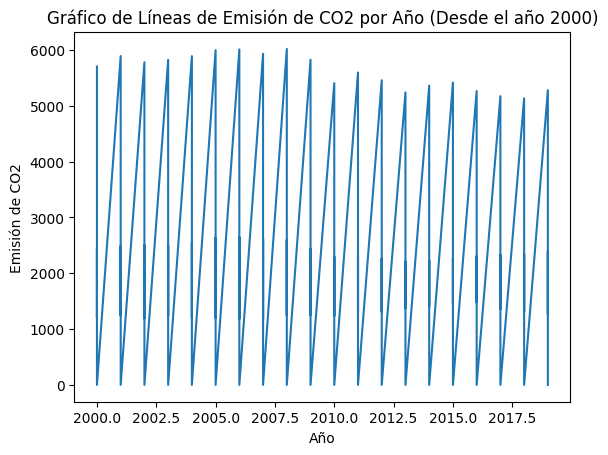

In [ ]:
# Filtra los datos del DataFrame df_energia para incluir solo los años a partir del 2000
df_energia_desde_2000 = df_energia[df_energia['Year'] >= 2000]

# Trazar el gráfico de líneas con los datos filtrados
plt.plot(df_energia_desde_2000['Year'], df_energia_desde_2000['CO2_emission'])

# Agrega etiquetas y título
plt.xlabel('Año')
plt.ylabel('Emisión de CO2')
plt.title('Gráfico de Líneas de Emisión de CO2 por Año (Desde el año 2000)')

# Muestra el gráfico
plt.show()

#Aunque es escasa impresiona una disminucion de menos del 1% de emisión de CO2 en estados unidos en general

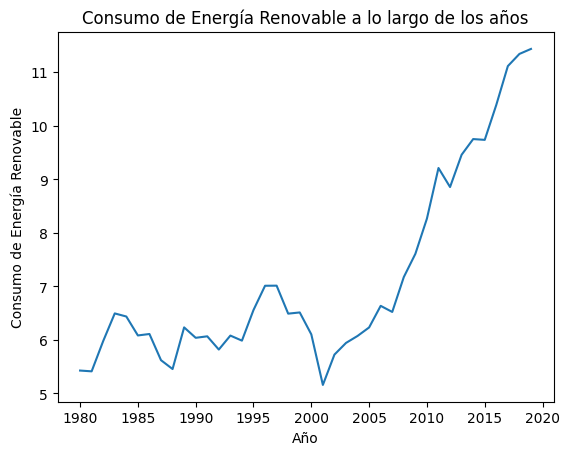

In [ ]:
# se evalúa si existe un aumento del consumo de energía renovable para ello filtramos datos
df_renewables = df_energia[['Year', 'Energy_type', 'Energy_consumption']]

# Luego filtro nuevamente para la columna que me interesa 
df_renewables = df_renewables[df_renewables['Energy_type'] == 'renewables_n_other']

# Agrupo los datos por año y calculo la suma total del consumo de energía renovable para cada año
df_renewables_grouped = df_renewables.groupby('Year')['Energy_consumption'].sum().reset_index()

# Trazar el gráfico de líneas para visualizar la tendencia a lo largo de los años
plt.plot(df_renewables_grouped['Year'], df_renewables_grouped['Energy_consumption'])

# Agrega etiquetas y título
plt.xlabel('Año')
plt.ylabel('Consumo de Energía Renovable')
plt.title('Consumo de Energía Renovable a lo largo de los años')

# Muestra el gráfico
plt.show()

#Se evidencia un aumento del consumo de energía renovable a partir del año 2000 con un tendencia aelerada desde el año 2006 aproximadamente

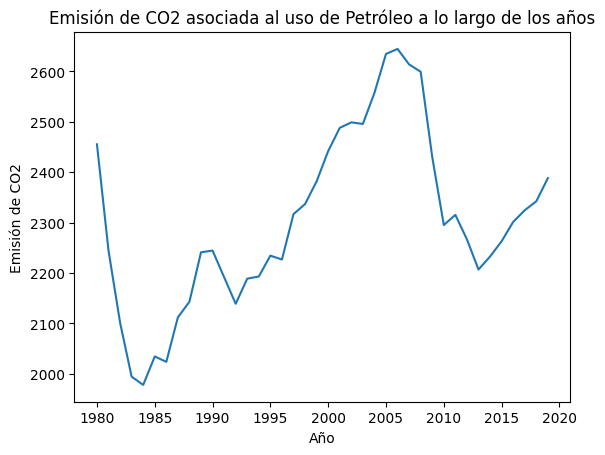

In [ ]:
# Se genera un filtro de los datos para evaluar lo que se requiere
df_petroleo = df_energia[['Year', 'Energy_type', 'CO2_emission']]

# Se genera un nuevo filtro para evaluar los datos asociados solo a uso de petroleo como metodo de generacion de energia
df_petroleo = df_petroleo[df_petroleo['Energy_type'] == 'petroleum_n_other_liquids']

# Se agrupan datos por año y emision de CO2
df_petroleo_grouped = df_petroleo.groupby('Year')['CO2_emission'].sum().reset_index()

# Trazar el gráfico de líneas para visualizar la tendencia a lo largo de los años
plt.plot(df_petroleo_grouped['Year'], df_petroleo_grouped['CO2_emission'])

# Agrega etiquetas y título
plt.xlabel('Año')
plt.ylabel('Emisión de CO2')
plt.title('Emisión de CO2 asociada al uso de Petróleo a lo largo de los años')

# Muestra el gráfico
plt.show()

#Impresiona que el año con mayor consumo de energía asociada al petroleo y mayor emision de CO2 es el año 2005 con posterior caida
#con una aceleracion de dicha caida en el año 2006 aparentemente sin embargo una reciente tendencia al alza nuevamente a partir del año 2016

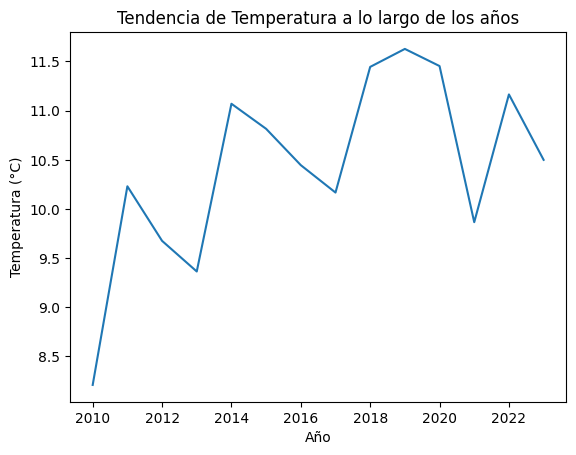

In [ ]:
# Se genera ahora el análisis de la temperatura para ello utilizo un filtro de los datos para evaluar lo que se requiere
df_temperatura['time'] = pd.to_datetime(df_temperatura['time']) # Convertir la columna 'time' al formato de fecha
df_temperatura['Year'] = df_temperatura['time'].dt.year # Extraer el año de la columna 'time' y almacenarlo en una nueva columna 'Year'

# Se agrupan datos por año y temperatura
df_grouped = df_temperatura.groupby('Year')['temperature_2m (°C)'].mean().reset_index()

# Trazar el gráfico de líneas para visualizar la tendencia de temperatura a lo largo de los años
plt.plot(df_grouped['Year'], df_grouped['temperature_2m (°C)'])

# Agrega etiquetas y título
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.title('Tendencia de Temperatura a lo largo de los años')

# Muestra el gráfico
plt.show()


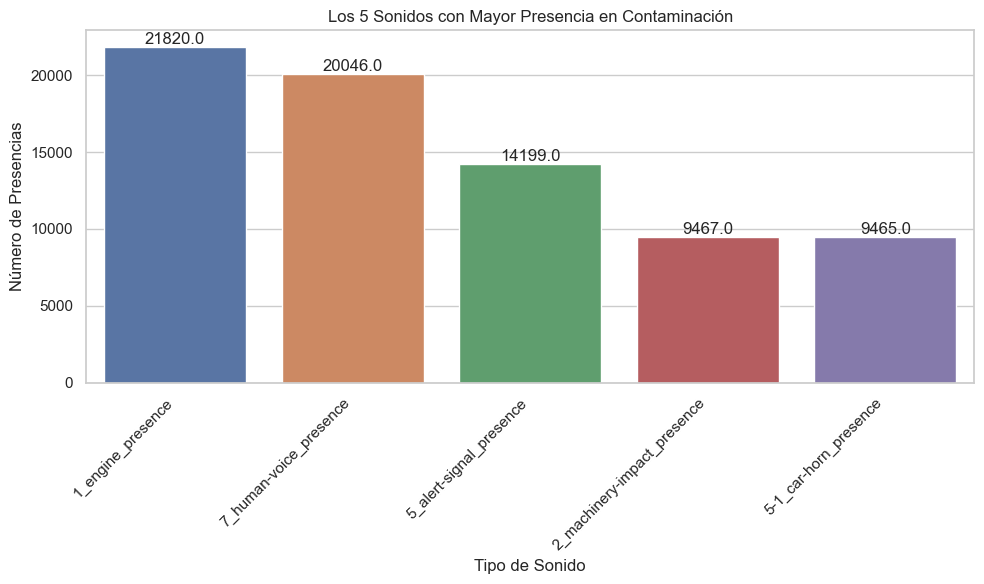

In [14]:
# Filtrar las columnas de interés
columns_of_interest = [
    '5-1_car-horn_presence', '5-2_car-alarm_presence', '5-4_reverse-beeper_presence',
    '1_engine_presence', '2_machinery-impact_presence', '3_non-machinery-impact_presence',
    '4_powered-saw_presence', '5_alert-signal_presence', '6_music_presence',
    '7_human-voice_presence', '8_dog_presence'
]
filtered_df = df_contaminacion_sonora[columns_of_interest]

# Reemplazar -1 con 1 para tratar ambos como presencia
filtered_df = filtered_df.replace(-1, 1)

# Calcular la suma de presencias para cada columna y ordenar de mayor a menor
sum_of_presences = filtered_df.sum().sort_values(ascending=False)

# Tomar solo los 5 sonidos con mayor presencia
top5_presences = sum_of_presences[:5]

# Crear un gráfico de barras utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras
ax = sns.barplot(x=top5_presences.index, y=top5_presences.values)

# Personalizar el gráfico
plt.title('Los 5 Sonidos con Mayor Presencia en Contaminación')
plt.xlabel('Tipo de Sonido')
plt.ylabel('Número de Presencias')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de valor en las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

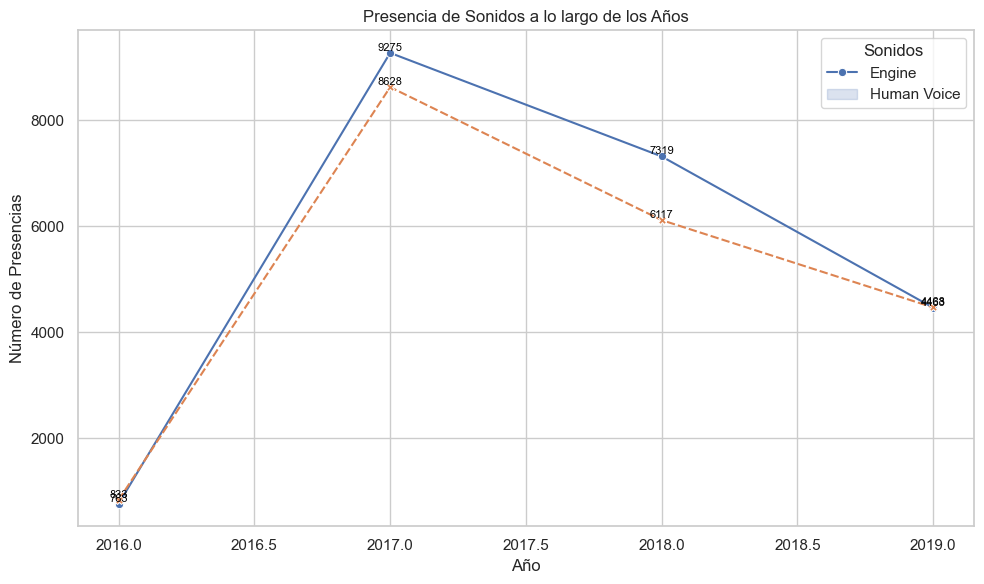

In [11]:
# Supongamos que tienes un DataFrame llamado df_contaminacion_sonora

# Filtrar las columnas de interés
columns_of_interest = ['year', '1_engine_presence', '7_human-voice_presence']
filtered_df = df_contaminacion_sonora[columns_of_interest]

# Reemplazar -1 con 1 para tratar ambos como presencia
filtered_df = filtered_df.replace(-1, 1)

# Agrupar y contar las presencias por año
grouped_df = filtered_df.groupby('year').sum()

# Crear un gráfico de línea utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico para presencia de engine y human-voice
sns.lineplot(data=grouped_df, markers=True)

# Personalizar el gráfico
plt.title('Presencia de Sonidos a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Presencias')
plt.legend(title='Sonidos', labels=['Engine', 'Human Voice'])

# Mostrar los valores en los puntos del gráfico
for col in grouped_df.columns:
    for x, y in zip(grouped_df.index, grouped_df[col]):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()